In [3]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import scikitplot as skplt
from matplotlib.colors import ListedColormap
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor

In [4]:
df = pd.read_csv("df_final.csv")

In [5]:
df.dropna(inplace=True)

In [6]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [7]:
df.head()

,Rating,Helpful,Review,Drug,Condition,Month,Year,Review_length,review_clean,Rating_Binary
0,8.0,9,accutane (isotretinoin):“i would give this med...,isotretinoin,Acne,December,2019,390,accutane isotretinoin would give medicine 10/1...,1
1,8.0,18,accutane (isotretinoin):“i started getting acn...,isotretinoin,Acne,December,2019,951,accutane isotretinoin started getting acne 13 ...,1
2,10.0,2,“its amazing for big pimples\r\nits clear my f...,isotretinoin,Acne,December,2019,48,amazing big pimples clear face,1
3,9.0,16,accutane (isotretinoin):“previously i had a se...,isotretinoin,Acne,December,2019,995,accutane isotretinoin previously serious acne ...,1
4,7.0,19,accutane (isotretinoin):“my back and abdomen a...,isotretinoin,Acne,December,2019,1008,accutane isotretinoin back abdomen acne became...,1


In [59]:
df['Rating_Binary'].value_counts(normalize=True)

1    0.687023
0    0.312977
Name: Rating_Binary, dtype: float64

In [21]:
test_scores1 = []
cv_scores1 = []

In [40]:
df_1 = df.loc[:,['Year','Month','Review_length', 'Helpful', 'Rating_Binary', 'Drug', 'Condition']]
dum_1 = pd.get_dummies(df_1, columns=['Year', 'Month', 'Drug', 'Condition'], drop_first=True)

In [41]:
X = dum_1
y = dum_1.pop('Rating_Binary')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3, stratify=y)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model_1 = LogisticRegression(solver = 'liblinear')

params = {'C': np.logspace(-4, 4, 10),
          'penalty': ['l1', 'l2'],
          'fit_intercept': [True, False]}

gs = GridSearchCV(estimator=model_1,
                  param_grid=params,
                  cv=5,
                  scoring='accuracy',
                  return_train_score=True)

gs.fit(X_train, y_train)

# extract the grid search results

print('Best Parameters:')
print(gs.best_params_)
print('Best estimator C:')
print(gs.best_estimator_.C)
print('Best estimator mean cross validated training score:')
print(gs.best_score_)
print('Best estimator score on the full training set:')
print(gs.score(X_train, y_train))
print('Best estimator score on the test set:')
print(gs.score(X_test, y_test))
print('Best estimator coefficients:')
print(gs.best_estimator_.coef_)

/Users/cgboothby/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/cgboothby/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/cgboothby/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/cgboothby/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/cgboothby/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: Con

Best Parameters:
{'C': 0.046415888336127774, 'fit_intercept': True, 'penalty': 'l1'}
Best estimator C:
0.046415888336127774
Best estimator mean cross validated training score:
0.7280947977694512
Best estimator score on the full training set:
0.7322376854056034
Best estimator score on the test set:
0.7260825780463243
Best estimator coefficients:
[[ 1.47485249e-01  8.20644335e-01 -1.73357714e-01 -9.33956704e-02
  -6.67589525e-02 -1.21949971e-01 -1.20262543e-01 -1.67319558e-01
  -3.17268471e-01 -4.76451448e-01 -4.14670844e-01 -3.97639535e-01
  -5.46126612e-01  0.00000000e+00 -9.92892716e-03  0.00000000e+00
  -1.46015330e-03 -1.51054665e-02  4.11746005e-03  0.00000000e+00
   0.00000000e+00 -4.61331127e-02 -2.73310981e-02 -1.30004226e-02
  -5.08340707e-02  6.41210983e-04 -8.29506927e-04  0.00000000e+00
   9.01531291e-02  1.79536462e-03  2.35073980e-02  4.49353098e-02
   4.50563133e-02  2.49185079e-02  4.15186038e-02  6.04029538e-02
  -2.28544402e-02  6.01293415e-04  1.29750820e-01  0.000000

In [24]:
test_scores1.append(gs.score(X_test, y_test))
cv_scores1.append(gs.best_score_)

In [25]:
df_2 = df.loc[:,['Year','Month','Review_length', 'Helpful', 'Rating_Binary']]

In [26]:
m = {
        'January': 1,
        'February': 2,
        'March': 3,
        'April':4,
         'May':5,
         'June':6,
         'July':7,
         'August':8,
         'September':9,
         'October':10,
         'November':11,
         'December':12
        }

In [27]:
df_2['Month'] = df_2['Month'].map(m)

In [28]:
dum_2 = pd.get_dummies(df_2, columns=['Year', 'Month'], drop_first=True)

In [30]:
X = dum_2
y = dum_2.pop('Rating_Binary')

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3, stratify=y)

model_2 = LogisticRegression(solver = 'liblinear')

params = {'C': np.logspace(-4, 4, 10),
          'penalty': ['l1', 'l2'],
          'fit_intercept': [True, False]}

gs = GridSearchCV(estimator=model_2,
                  param_grid=params,
                  cv=5,
                  scoring='accuracy',
                  return_train_score=True)

gs.fit(X_train, y_train)

# extract the grid search results

print('Best Parameters:')
print(gs.best_params_)
print('Best estimator C:')
print(gs.best_estimator_.C)
print('Best estimator mean cross validated training score:')
print(gs.best_score_)
print('Best estimator score on the full training set:')
print(gs.score(X_train, y_train))
print('Best estimator score on the test set:')
print(gs.score(X_test, y_test))
print('Best estimator coefficients:')
print(gs.best_estimator_.coef_)

Best Parameters:
{'C': 0.046415888336127774, 'fit_intercept': True, 'penalty': 'l1'}
Best estimator C:
0.046415888336127774
Best estimator mean cross validated training score:
0.6930276871083855
Best estimator score on the full training set:
0.6930736128914118
Best estimator score on the test set:
0.6926668497665477
Best estimator coefficients:
[[ 7.21708927e-04  1.35843972e-02 -1.80524229e-01  0.00000000e+00
   8.63142071e-02 -3.67924710e-02  6.27805390e-02  0.00000000e+00
  -5.09166563e-01 -8.91135337e-01 -8.64042396e-01 -9.41027926e-01
  -1.19712050e+00  0.00000000e+00  2.18264935e-02  2.93488155e-02
   0.00000000e+00  4.08743201e-03  0.00000000e+00  0.00000000e+00
  -2.19526423e-04 -5.78721306e-02 -1.33191521e-01  0.00000000e+00]]


In [32]:
test_scores1.append(gs.score(X_test, y_test))
cv_scores1.append(gs.best_score_)

In [8]:
X = df.review_clean
y = df.Rating_Binary

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3, stratify=y)

In [42]:
X = df.review_clean
y = df.Rating_Binary

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3, stratify=y)

pl1 = Pipeline([
        ('vectorizer', CountVectorizer()),
        ('clf', LogisticRegression(solver='liblinear'))])

pl1.fit(X_train, y_train)

pl1_test = pl1.score(X_test, y_test)
pl1_cv = cross_val_score(pl1, X_train, y_train, cv=5).mean()

In [36]:
test_scores1.append(pl1_test)
cv_scores1.append(pl1_cv)

In [61]:
pl2 = Pipeline([
        ('vectorizer', CountVectorizer(ngram_range=(1, 2))),
        ('clf', LogisticRegression(solver='liblinear'))])

pl2.fit(X_train, y_train)

pl2_test = pl2.score(X_test, y_test)
pl2_cv = cross_val_score(pl2, X_train, y_train, cv=5).mean()

In [62]:
pl2.

Pipeline(steps=[('vectorizer', CountVectorizer(ngram_range=(1, 2))),
                ('clf', LogisticRegression(solver='liblinear'))])

In [ ]:
resampled = pd.DataFrame

In [39]:
test_scores1.append(pl2_test)
cv_scores1.append(pl2_cv)

In [43]:
pl3 = Pipeline([
        ('vectorizer', CountVectorizer(ngram_range=(2, 4))),
        ('clf', LogisticRegression(solver='liblinear'))])

pl3.fit(X_train, y_train)

pl3_test = pl3.score(X_test, y_test)
pl3_cv = cross_val_score(pl3, X_train, y_train, cv=5).mean()

In [44]:
test_scores1.append(pl3_test)
cv_scores1.append(pl3_cv)

In [45]:
test_scores1

[0.7262656779273093,
 0.6926668497665477,
 0.841252403185938,
 0.8763160303945803,
 0.8416186029479081]

In [46]:
cv_scores1

[0.7282779034124871,
 0.6930276871083855,
 0.8323796348591334,
 0.8668742021137877,
 0.8288545755046905]

In [47]:
labels = ['LogisticRegression \nwith all variables', 'LogisticRegression \nwith numerical variables' ,
          'LogisticRegression \nwith text', 'LogisticRegression \nwith text(ngram=(1,2))', 'LogisticRegression \nwith text(ngram=(2,4))']

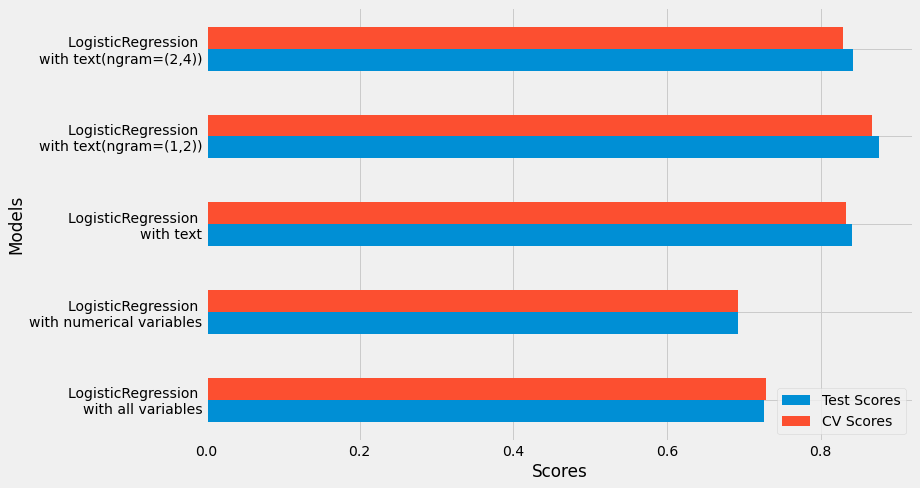

In [49]:
plt.style.use('fivethirtyeight')
x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(13,7))
rects1 = ax.barh(x - width/2, test_scores1, width, label='Test Scores')
rects2 = ax.barh(x + width/2, cv_scores1, width, label='CV Scores')

ax.set_ylabel('Models')
ax.set_xlabel('Scores')
ax.set_yticks(x)
ax.set_yticklabels(labels)
ax.legend()


fig.tight_layout()

plt.show()

In [51]:
test_scores2 = []
cv_scores2 = []

In [9]:
X = df.review_clean
y = df.Rating_Binary

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3, stratify=y)

In [156]:
pl_4 = Pipeline([
        ('vectorizer', CountVectorizer(ngram_range=(1, 2))),
        ('clf', LogisticRegression(penalty = 'none',max_iter=1000))])


params = {'clf__C':np.logspace(-4, 4, 10),
          'clf__fit_intercept':[True, False]}

gs1 = GridSearchCV(estimator=pl_4,
                  param_grid=params,
                  cv=5,
                  scoring='accuracy',
                  return_train_score=True)

gs1.fit(X_train, y_train)

cv1 = gs1.best_score_
test1 = gs1.score(X_test, y_test)

print('Best Parameters:')
print(gs1.best_params_)

/Users/cgboothby/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cgboothby/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cgboothby/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cgboothby/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cgboothby/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cgboothby/opt/anaconda3

/Users/cgboothby/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cgboothby/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cgboothby/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cgboothby/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cgboothby/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cgboothby/opt/anaconda3

/Users/cgboothby/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cgboothby/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cgboothby/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cgboothby/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cgboothby/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cgboothby/opt/anaconda3

Best Parameters:
{'clf__C': 0.01, 'clf__fit_intercept': True, 'clf__max_iter': 1000}


In [54]:
pl4 = Pipeline([
        ('vectorizer', CountVectorizer(ngram_range=(1, 2))),
        ('clf', LogisticRegression(penalty = 'none', max_iter=10000))])

pl4.fit(X_train, y_train)

pl4_test = pl4.score(X_test, y_test)
pl4_cv = cross_val_score(pl4, X_train, y_train, cv=5).mean()

In [10]:
pl_5 = Pipeline([
        ('vectorizer', CountVectorizer(ngram_range=(1, 2))),
        ('clf', LogisticRegression(solver = 'liblinear', penalty = 'l1', max_iter=1000))])


params = {'clf__C':np.logspace(-4, 4, 10),
          'clf__fit_intercept':[True, False]
         }

gs5 = GridSearchCV(pl_5,
                  param_grid=params,
                  cv=5,
                  scoring='accuracy',
                  return_train_score=True)

gs5.fit(X_train, y_train)

# extract the grid search results

cv_pl5 = gs5.best_score_
test_pl5 = gs5.score(X_test, y_test)

print('Best Parameters:')
print(gs5.best_params_)

Best Parameters:
{'clf__C': 1291.5496650148827, 'clf__fit_intercept': False}


In [12]:
test_pl5

0.8587384418200128

In [58]:
test_scores2.append(pl4_test)
cv_scores2.append(pl4_cv)

In [61]:
pl5 = Pipeline([
        ('vectorizer', CountVectorizer(ngram_range=(1, 2))),
        ('clf', LogisticRegression(solver = 'liblinear', penalty = 'l1'))])

pl5.fit(X_train, y_train)

pl5_test = pl5.score(X_test, y_test)
pl5_cv = cross_val_score(pl5, X_train, y_train, cv=5).mean()

In [9]:
pl_6 = Pipeline([
        ('vectorizer', CountVectorizer(ngram_range=(1, 2))),
        ('clf', LogisticRegression(solver = 'liblinear', penalty = 'l2', max_iter=1000))])


params = {'clf__C':np.logspace(-4, 4, 10),
          'clf__fit_intercept':[True, False]
         }

gs6 = GridSearchCV(pl_6,
                  param_grid=params,
                  cv=5,
                  scoring='accuracy',
                  return_train_score=True)

gs6.fit(X_train, y_train)

# extract the grid search results

cv_pl6 = gs6.best_score_
test_pl6 = gs6.score(X_test, y_test)

print('Best Parameters:')
print(gs6.best_params_)

Best Parameters:
{'clf__C': 0.3593813663804626, 'clf__fit_intercept': False}


In [71]:
test_pl6

0.8773230797399981

In [62]:
test_scores2.append(pl5_test)
cv_scores2.append(pl5_cv)

In [66]:
pl6 = Pipeline([
        ('vectorizer', CountVectorizer(ngram_range=(1, 2))),
        ('clf', LogisticRegression(solver = 'liblinear', penalty = 'l2'))])

pl6.fit(X_train, y_train)

pl6_test = pl6.score(X_test, y_test)
pl6_cv = cross_val_score(pl6, X_train, y_train, cv=5).mean()

In [67]:
test_scores2.append(pl6_test)
cv_scores2.append(pl6_cv)

In [72]:
pl7 = Pipeline([
        ('vectorizer', CountVectorizer(ngram_range=(1, 2))),
        ('clf', AdaBoostClassifier(
                           n_estimators=100))])

pl7.fit(X_train, y_train)

pl7_test = pl7.score(X_test, y_test)
pl7_cv = cross_val_score(pl7, X_train, y_train, cv=5).mean()

In [75]:
test_scores2.append(pl7_test)
cv_scores2.append(pl7_cv)

In [78]:
pl8 = Pipeline([
        ('vectorizer', CountVectorizer(ngram_range=(1, 2))),
        ('clf', GradientBoostingClassifier(
                           n_estimators=100))])

pl8.fit(X_train, y_train)

pl8_test = pl8.score(X_test, y_test)
pl8_cv = cross_val_score(pl8, X_train, y_train, cv=5).mean()

In [80]:
test_scores2.append(pl8_test)
cv_scores2.append(pl8_cv)

In [83]:
pl9 = Pipeline([
        ('vectorizer', CountVectorizer(ngram_range=(1, 2))),
        ('clf', AdaBoostClassifier(base_estimator=LogisticRegression(solver='liblinear'),
                           n_estimators=100))])

pl9.fit(X_train, y_train)

pl9_test = pl9.score(X_test, y_test)
pl9_cv = cross_val_score(pl9, X_train, y_train, cv=5).mean()

In [84]:
test_scores2.append(pl9_test)
cv_scores2.append(pl9_cv)

In [87]:
pl10 = Pipeline([
        ('vectorizer', CountVectorizer(ngram_range=(1, 2))),
        ('clf', RandomForestClassifier(max_depth=5))])

pl10.fit(X_train, y_train)

pl10_test = pl10.score(X_test, y_test)
pl10_cv = cross_val_score(pl10, X_train, y_train, cv=5).mean()

In [88]:
test_scores2.append(pl10_test)
cv_scores2.append(pl10_cv)

In [89]:
pl11 = Pipeline([
        ('vectorizer', CountVectorizer(ngram_range=(1, 2))),
        ('clf', DecisionTreeClassifier(max_depth=3, max_features=0.3))])

pl11.fit(X_train, y_train)

pl11_test = pl11.score(X_test, y_test)
pl11_cv = cross_val_score(pl11, X_train, y_train, cv=5).mean()

In [90]:
test_scores2.append(pl11_test)
cv_scores2.append(pl11_cv)

In [49]:
test_scores2 = [0.877, 0.687, 0.701, 0.864, 0.690, 0.780, 0.748, 0.800]
cv_scores2 = [0.867, 0.687, 0.698, 0.851, 0.681, 0.779, 0.753, 0.799]

In [50]:
labels = ['LogisticRegression \nRidge','RandomForestClassifier', 'DecisionTreeClassifier','SVM \nLinear', 'KNN', 'AdaBoost', 'GradientBoosting', 'AdaBoost \nLogistic Regression']

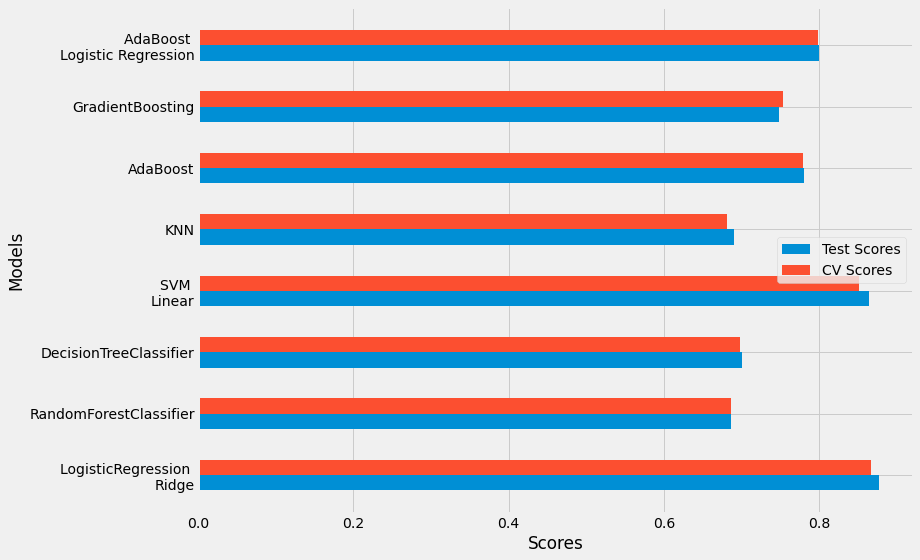

In [51]:
plt.style.use('fivethirtyeight')
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(13,8))
rects1 = ax.barh(x - width/2, test_scores, width, label='Test Scores')
rects2 = ax.barh(x + width/2, cv_scores, width, label='CV Scores')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Models')
ax.set_xlabel('Scores')
ax.set_yticks(x)
ax.set_yticklabels(labels)
ax.legend()


fig.tight_layout()

plt.show()

In [100]:
predictions_train = pl6.predict(X_train)
predictions_test = pl6.predict(X_test)

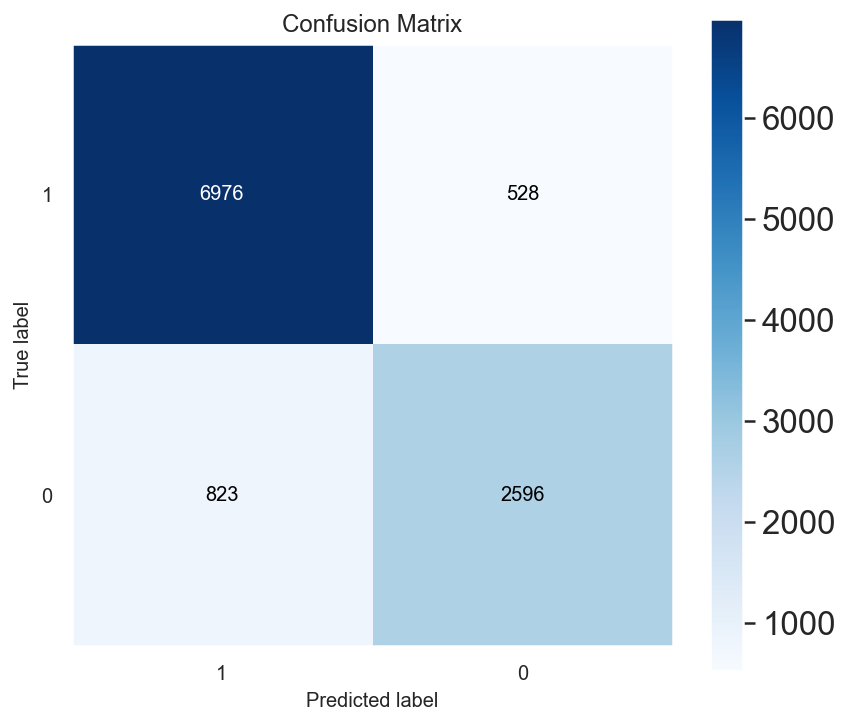

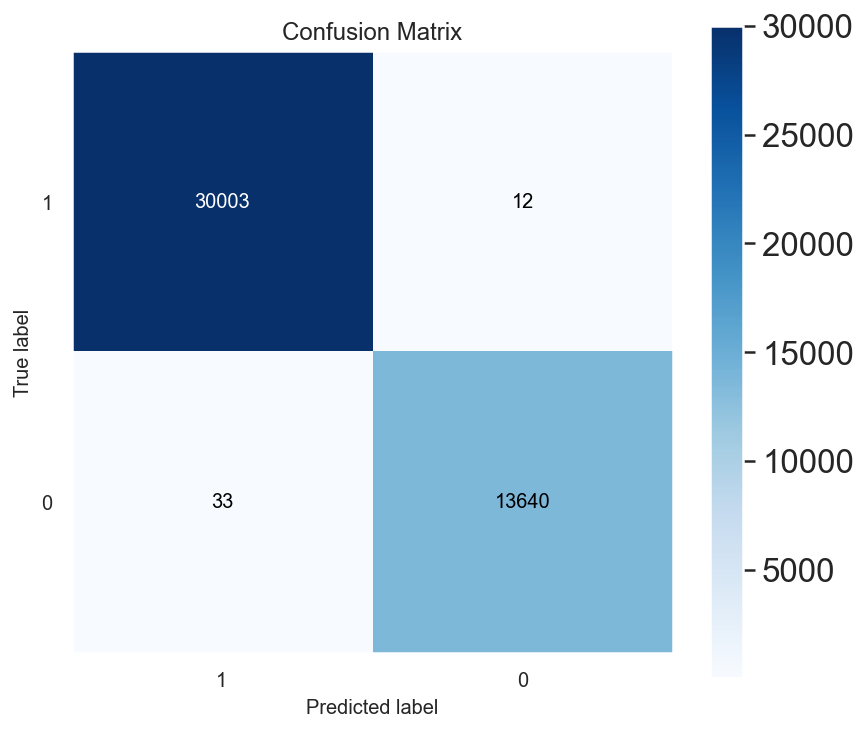

In [110]:
skplt.metrics.plot_confusion_matrix(y_test, predictions_test, labels=[1, 0], figsize=(6,6))
plt.show()
skplt.metrics.plot_confusion_matrix(y_train, predictions_train, labels=[1, 0], figsize=(6,6))
plt.show()

In [102]:
print(classification_report(y_train, predictions_train))
print(classification_report(y_test, predictions_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13673
           1       1.00      1.00      1.00     30015

    accuracy                           1.00     43688
   macro avg       1.00      1.00      1.00     43688
weighted avg       1.00      1.00      1.00     43688

              precision    recall  f1-score   support

           0       0.83      0.76      0.79      3419
           1       0.89      0.93      0.91      7504

    accuracy                           0.88     10923
   macro avg       0.86      0.84      0.85     10923
weighted avg       0.87      0.88      0.87     10923



In [103]:
probabilities_train = pl6.predict_proba(X_train)
probabilities_test = pl6.predict_proba(X_test)

In [120]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("husl", len(pl6.classes_)))
sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

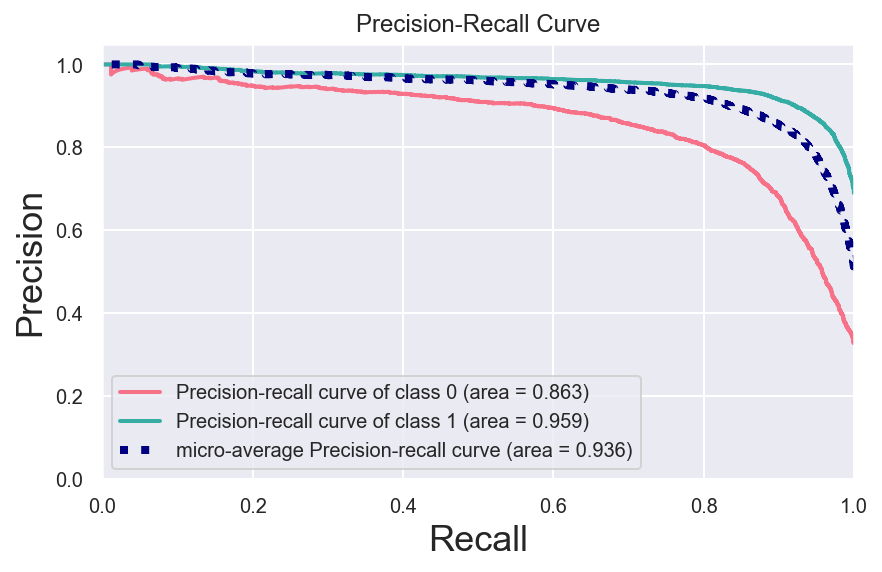

In [121]:
skplt.metrics.plot_precision_recall(y_test, probabilities_test, cmap=cmap)
plt.show()

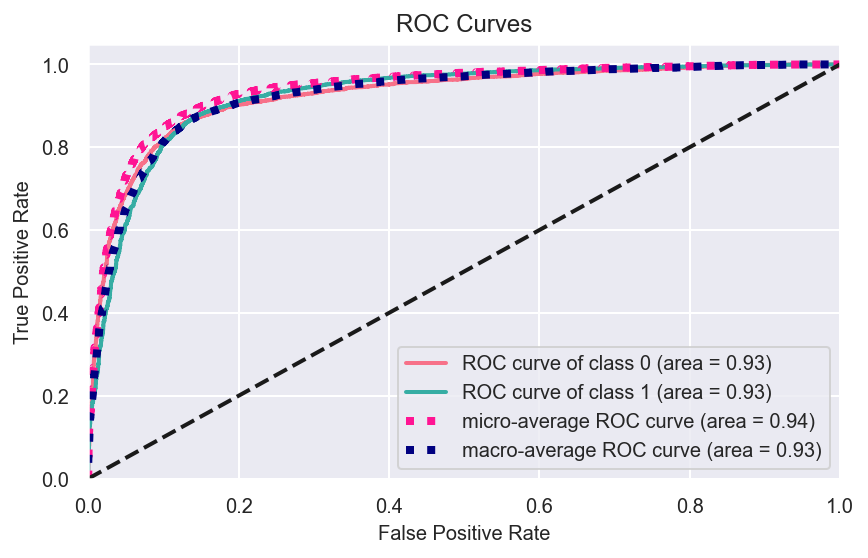

In [122]:
skplt.metrics.plot_roc(y_test, probabilities_test, cmap=cmap)
plt.show()

In [10]:
df1 = pd.DataFrame(gs6.best_estimator_['clf'].coef_.T)
df1 = df1.add_prefix('X_')

In [11]:
df2 = pd.DataFrame(gs6.best_estimator_['vectorizer'].get_feature_names())
df2 = df2.add_prefix('Y_')

In [12]:
result = pd.concat([df1, df2], axis=1, sort=False)

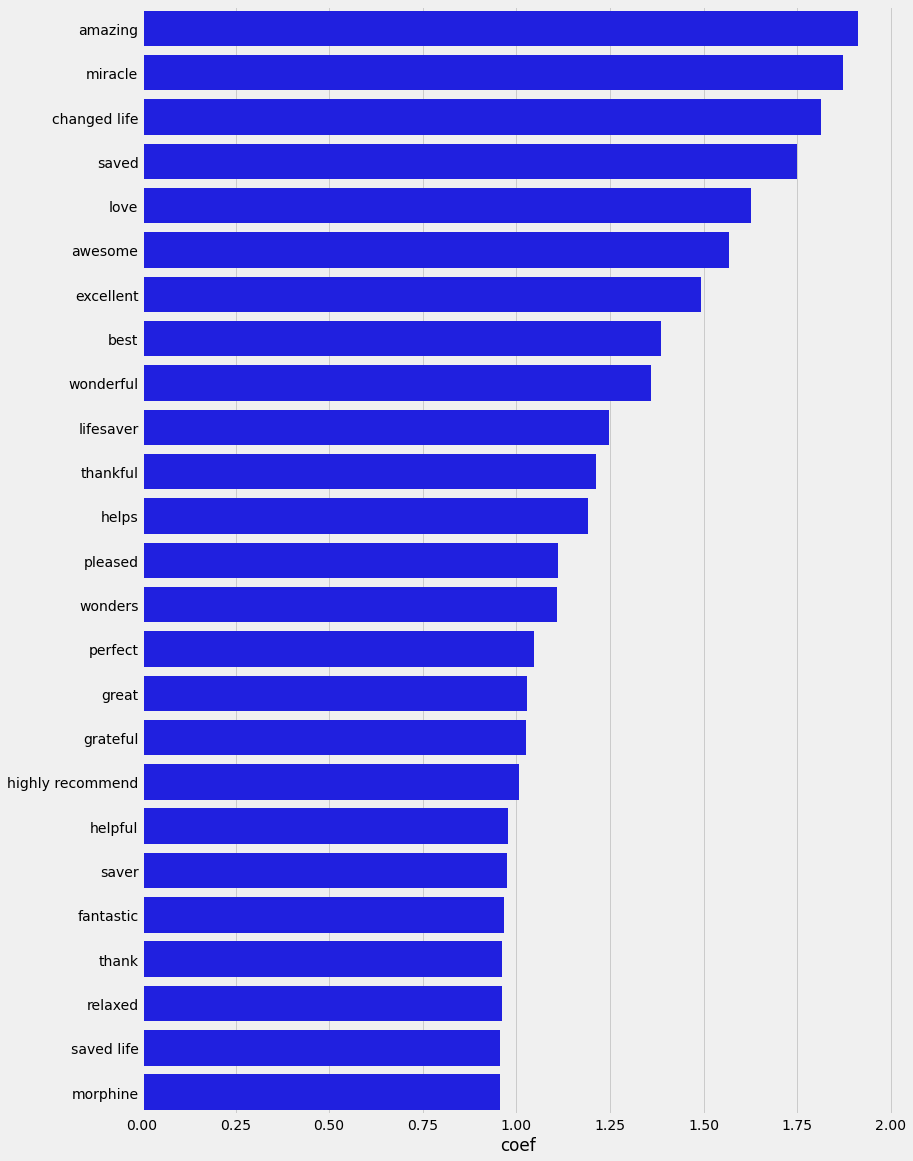

In [13]:
df_3 = pd.DataFrame(result.copy().sort_values(by='X_0',ascending=False)[:25])
df_3.set_index('Y_0', inplace=True)
df_3.index.name = None
df_3.rename(columns = {'X_0':'coef'}, inplace = True)

plt.style.use('fivethirtyeight')
fig,ax= plt.subplots(figsize=(12,19))
sns.barplot(y=df_3.index,x=df_3.coef, orient='h',ax=ax, color='b');
plt.show()

In [14]:
df_3

,coef
amazing,1.911879
miracle,1.871578
changed life,1.812439
saved,1.748724
love,1.625894
awesome,1.568278
excellent,1.493723
best,1.385059
wonderful,1.358750
lifesaver,1.248302


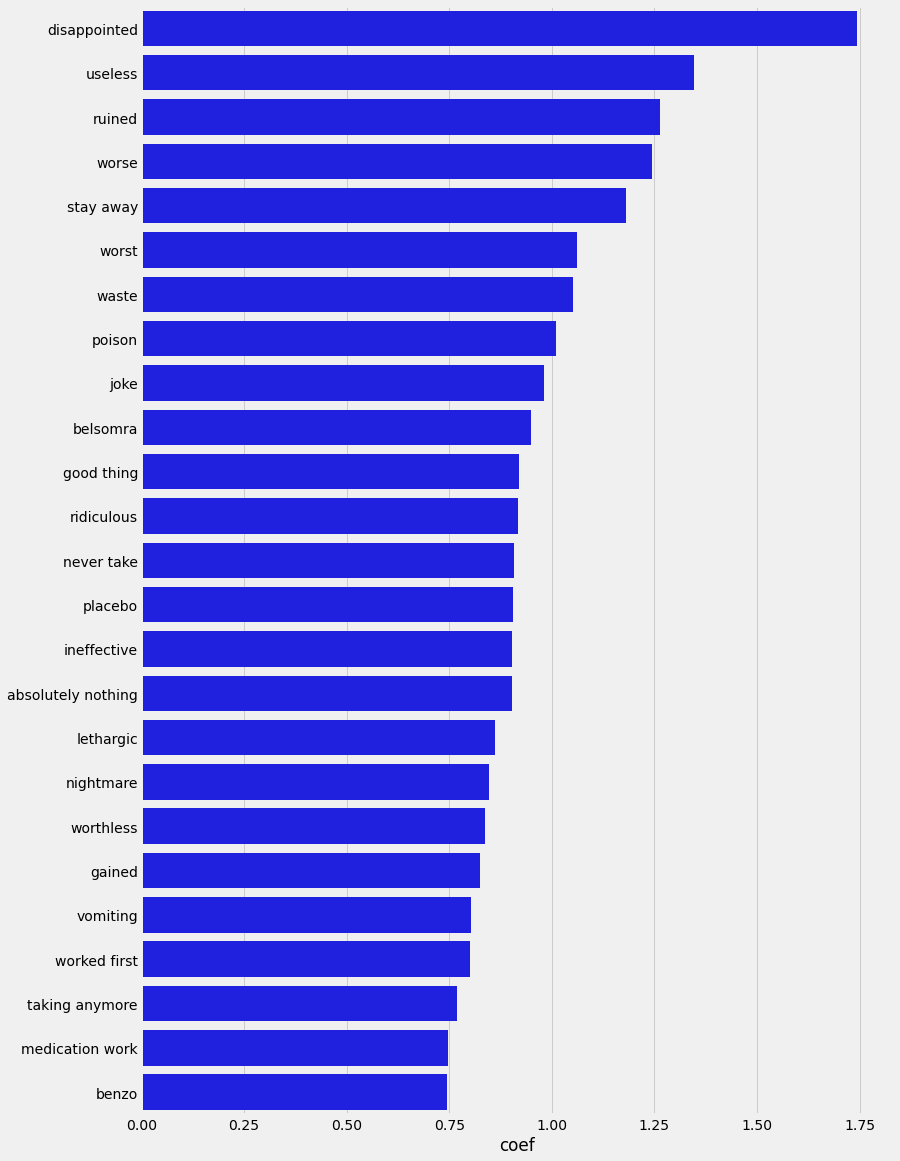

In [15]:
df_4 = pd.DataFrame(result.copy().sort_values(by='X_0',ascending=True)[:25])
df_4.set_index('Y_0', inplace=True)
df_4.index.name = None
df_4.rename(columns = {'X_0':'coef'}, inplace = True)
df_4['coef'] = df_4['coef'] * -1

plt.style.use('fivethirtyeight')
fig,ax= plt.subplots(figsize=(12,19))
sns.barplot(y=df_4.index,x=df_4.coef, orient='h',ax=ax, color='b');
plt.show()

In [16]:
df_4

,coef
disappointed,1.744413
useless,1.346074
ruined,1.262558
worse,1.244930
stay away,1.181737
worst,1.062202
waste,1.050629
poison,1.011105
joke,0.980892
belsomra,0.948963


In [123]:
word_table = pd.read_csv('../../resource-datasets/HIV/inquirerbasic.csv')

In [124]:
import regex as re

In [132]:
df_5 = df.loc[:, ['Helpful', 'Drug', 'Condition', 'review_clean', 'Rating_Binary']]

In [133]:
X = df_5
y = df_5.pop('Rating_Binary')

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3, stratify=y)

pl2 = Pipeline([
        ('vectorizer', CountVectorizer(ngram_range=(1, 2))),
        ('clf', LogisticRegression(solver = 'liblinear'))])

pl2.fit(X_train['review_clean'], y_train)

Pipeline(steps=[('vectorizer', CountVectorizer(ngram_range=(1, 2))),
                ('clf', LogisticRegression(solver='liblinear'))])

In [135]:
vectorizer = CountVectorizer(vocabulary = Positiv_word_list)
content = X_test['review_clean']
X = vectorizer.fit_transform(content)
f = X.toarray()
f = pd.DataFrame(f)
f.columns=Positiv_word_list
X_test["num_Positiv_word"] = f.sum(axis=1)

vectorizer2 = CountVectorizer(vocabulary = Negativ_word_list)
content = X_test['review_clean']
X2 = vectorizer2.fit_transform(content)
f2 = X2.toarray()
f2 = pd.DataFrame(f2)
f2.columns=Negativ_word_list
X_test["num_Negativ_word"] = f2.sum(axis=1)

X_test["Positiv_ratio"] = X_test["num_Positiv_word"]/(X_test["num_Positiv_word"]+X_test["num_Negativ_word"])
X_test["sentiment_by_dic"] = X_test["Positiv_ratio"].apply(lambda x: 1 if (x>=0.5) else (0 if (x<0.5) else 0.5))

def userful_count(data):
    grouped = data.groupby(['Condition']).size().reset_index(name='user_size')
    data = pd.merge(data,grouped,on='Condition',how='left')
    return data
#___________________________________________________________
df_reccomendations =  userful_count(X_test) 

<ipython-input-135-55e57b1ae662>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["num_Positiv_word"] = f.sum(axis=1)
<ipython-input-135-55e57b1ae662>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["num_Negativ_word"] = f2.sum(axis=1)
<ipython-input-135-55e57b1ae662>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [136]:
df_reccomendations['usefulCount'] = df_reccomendations['Helpful']/df_reccomendations['user_size']

In [139]:
model_predictions = pl2.predict(df_reccomendations['review_clean'])
df_reccomendations['model_predictions'] = model_predictions

df_reccomendations['total_pred'] = (df_reccomendations['model_predictions'] + df_reccomendations['sentiment_by_dic'])*df_reccomendations['usefulCount']

In [140]:
df_reccomendations_final = df_reccomendations.groupby(['Condition','Drug']).agg({'total_pred' : ['mean']})
df_reccomendations_final.head(30)

total_pred
                                               mean
Condition Drug                                     
ADHD      adderall                         0.059711
          adderall xr                      0.048543
          amphetamine/dextroamphetamine    0.044772
          atomoxetine                      0.046136
          concerta                         0.056240
          dexmethylphenidate               0.043793
          guanfacine                       0.084387
          lisdexamfetamine                 0.051329
          methylphenidate                  0.044478
          strattera                        0.067744
          vyvanse                          0.050018
Acne      adapalene / benzoyl peroxide     0.011579
          benzoyl peroxide/clindamycin     0.012247
          doxycycline                      0.013631
          drospirenone/ethinyl estradiol   0.011424
          epiduo                           0.013570
          ethinyl estradiol/norgestimate   0.023395
          isotretinoin                     0.021739
          minocycline                      0.010297
Allergies hydroxyzine                      0.517520
          levocetirizine                   0.151887
          xyzal                            0.204644
Angina    carvedilol                       0.187500
          isosorbide dinitrate             1.453125
          isosorbide mononitrate           0.781250
          lopressor                        2.203125
          metoprolol                       0.000000
          metoprolol tartrate              1.078125
          nitroglycerin                    0.421875
          nitrolingual pumpspray           1.921875

In [141]:
df_reccomendations_final.to_csv("df_reccomendations_final.csv")